# Homework Assinment 2 
## Fedir Vasyliev s234542

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1 Multiple Choice
## A
Answer: 4

## B
Answer: 1

## C
Answer: 1

## D
Answer: 2

# 2
### 1)

In [12]:
f = lambda x: np.log(x)
x = np.linspace(1,2,10)
y = f(x)
nodes = np.linspace(1,2,400)
p9 = InterpolerLangrangeForm(x, y, nodes)
real_error = np.abs(f(nodes).reshape(400,1) - p9)
max_error = np.max(real_error)
print("Maximum error of a given approximation =", max_error)

Maximum error of a given approximation = 3.6304793740726815e-08


## 2)
So given the theoretical upper bound for the error as follows
\begin{equation}
\frac{1}{4(n+1)}Mh^{n+1}
\end{equation},
where $M$ is the maximum value of the $n+1$ derivative of the function we are approximating on the given interval.

As we are given the $n^{th}$ derivative to be $|f^{(n)}(x)| = \frac{(n-1)!}{x^n} \, \Rightarrow$ $M = \frac{9!}{1^{10}}$.

$h^{10}  = (1/9)^{10}$

\begin{equation}
Error = \frac{1}{4(10)} \cdot \frac{9!}{1^{10}} \cdot (1/9)^{10} = 2.6 \cdot 10^{-6}
\end{equation}


In [22]:
theor_error = 1/(4*10) * factorial(9) * (1/9)**10
theor_error

2.6018241900469016e-06

In [62]:
x = np.linspace(1,2,26)
y = f(x)
p25 = InterpolerLangrangeForm(x, y, nodes)

## 3)

In [63]:
real_error25 = np.abs(f(nodes).reshape(400,1) - p25)
max_error25 = np.max(real_error25)
max_error25

1.8643494734127408e-11

## 4)
The theoretical error for 25 points is -14 orders of magnitude, but we got -11, which is greater. One reason this can happen is that equally spaced points on the interval are not the best choice, which can lead to large errors on the edges of the interval. The better choice would be Chebyshev nodes. This is called Runge's phenomenon.

The plot below shows the error on the interval. It is clear that maximum error is on the edges. 

In [59]:
theor_error25 = 1/(4*26) * factorial(25) * (1/25)**26
theor_error25

6.716949978001054e-14

/tmp/ipykernel_24521/857074664.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(nodes, np.log10(real_error25))


Text(0, 0.5, 'log_10(real_error25)')

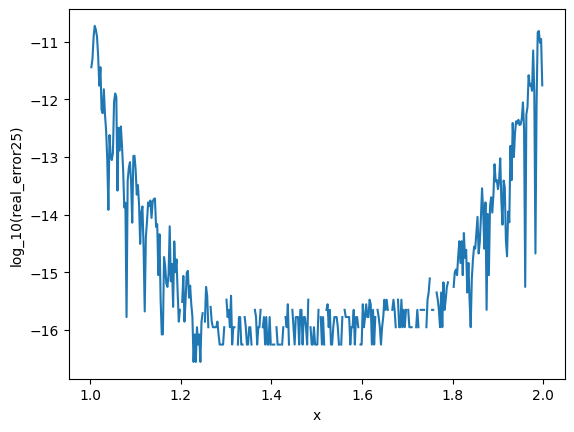

In [65]:
plt.plot(nodes, np.log10(real_error25))
plt.xlabel('x')
plt.ylabel('log_10(real_error25)')

# 3)

In [73]:
def MySimpson(f, a, b, n):
    if n % 2 != 0:
        return None
    h = (b-a)/n
    integral = 0
    boundary = f(a) + f(b)
    for i in range(1,n,1):
        if i % 2 == 0:
            integral += 2*f(a+h*i)
        else:
            integral += 4*f(a+h*i)
    integral = h/3 * (integral + boundary)
    return integral

## 2)
The real value of the integral is 2. The expected error should be proportional to $\frac{1}{n^4}$, and it is. However, a further increase in the number of subintervals doesn't make a big difference in the error reduction.  

[0.09439510239319526,
 0.0045597549844207386,
 0.0008631896735362687,
 0.0002691699483881038,
 0.00010951731500430384,
 5.26243411855809e-05,
 2.8343551468523742e-05,
 1.6591047935499148e-05,
 1.0347705774460536e-05]

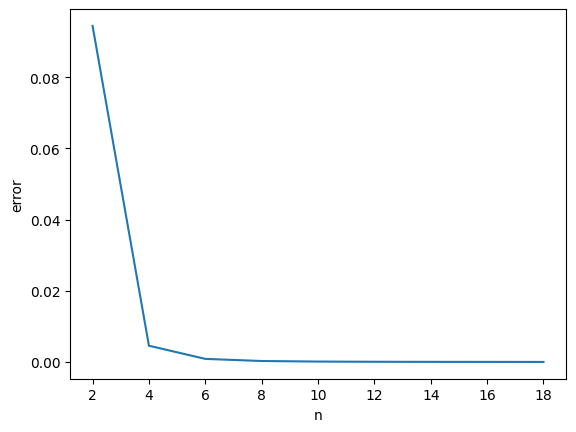

In [97]:
f = lambda x: np.sin(x)
err = []
N = []
for n in range(2,20,2):
    err.append(np.abs(2-MySimpson(f,0,np.pi,n)))
    N.append(n)
plt.plot(N, err)
plt.xlabel('n')
plt.ylabel('error')
err

## 3)

The error for the simpson rule is $Err = \frac{(b-a)^5}{180n^4} \cdot f^{(4)}(\xi)$, the forth derivative of $sin$ is $f^{(4)} = sin$, so $\xi = 0$. Thus, $Err = \frac{(\pi)^5}{180n^4}$.

## 4)

$10^{-4} = \frac{(\pi)^5}{180n^4} \, \Rightarrow n = 10\cdot(\frac{\pi^2}{180})^{1/4} = 4.8$, we need to round up to the nearest even number, that is $6$. This result is consistent with what we got in question 2 for the real error.

In [99]:
10*(np.pi**2/180)**0.25

4.839013236546174

# Code used for exercises

In [16]:
def factorial(x):
    if x == 0: return 1
    if x == 1: return 1
    return x*factorial(x-1)

def CardinalPolynomial(nodes, i, t):
    cardinals = []
    #loop that calculates ith polynomial
    for arg in t: 
        l = 1
        for index in range(len(nodes)):
            if index == i: 
                continue
            else:
                l*=(arg-nodes[index])/(nodes[i]-nodes[index])
        cardinals.append(l)
    return cardinals
    
def InterpolerLangrangeForm(nodes, ydata, t):
    ydata = np.r_[*ydata].reshape(-1, 1)
    nodes = np.r_[*nodes]
    cardinals_matrix = []

    for i in range(len(nodes)):
        cardinals = np.array(CardinalPolynomial(nodes, i, t)).T
        cardinals_matrix.append(cardinals)

    cardinals_matrix = np.column_stack(cardinals_matrix)
    lagrange = cardinals_matrix @ ydata

    return lagrange